**Week-7**

Feature Importance (Random Forest):

In [18]:
import pandas as pd
import numpy as np
df = pd.read_excel('training_data.xlsx')
pd.set_option('display.max_columns',None)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,target
0,1,1,1,1,0,0,0,1,0,0,43,1,5,0,0,38,0,1,0
1,0,0,0,0,0,0,1,1,0,1,28,0,0,0,0,43,0,4,0
2,1,0,1,1,1,1,1,1,1,1,37,0,9,0,1,63,0,4,1
3,1,1,0,1,1,0,0,1,1,1,32,0,1,0,0,15,0,4,1
4,0,1,0,0,1,1,0,0,1,1,52,1,5,0,0,31,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1,1,1,1,1,1,1,0,1,1,59,1,9,0,0,64,0,4,1
816,1,1,1,1,1,0,1,1,1,1,43,1,9,0,0,42,0,4,1
817,1,0,1,1,0,1,1,1,0,1,20,0,4,0,0,14,0,4,1
818,1,0,1,1,1,0,0,1,1,0,25,0,8,0,0,33,0,4,1


In [19]:
X_train = df.drop('target',axis=1)
y_train = df.target

In [20]:
best_params_rf = {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}  

            Feature  Importance  Importance (%)
8          A9_Score    0.151675           15.17
4          A5_Score    0.138778           13.88
5          A6_Score    0.125712           12.57
2          A3_Score    0.091354            9.14
15   country_of_res    0.072393            7.24
10              age    0.069526            6.95
3          A4_Score    0.058425            5.84
12        ethnicity    0.054764            5.48
9         A10_Score    0.048273            4.83
0          A1_Score    0.043314            4.33
6          A7_Score    0.036346            3.63
1          A2_Score    0.026731            2.67
7          A8_Score    0.026067            2.61
11           gender    0.021296            2.13
17         relation    0.021288            2.13
14           autism    0.007246            0.72
13         jaundice    0.005527            0.55
16  used_app_before    0.001286            0.13


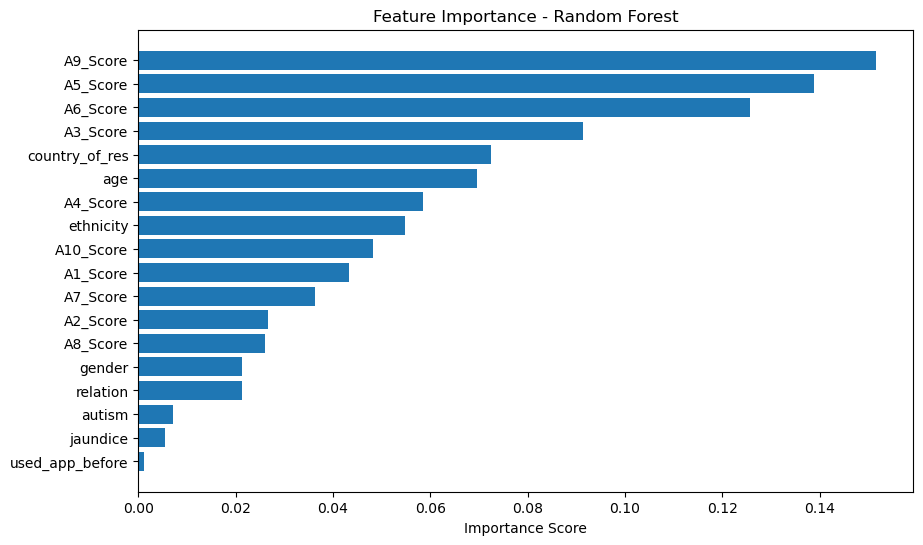

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(**best_params_rf)  # Using best params from tuning
model_rf.fit(X_train, y_train)

# Getting feature importances
importances_rf = model_rf.feature_importances_
feature_names = X_train.columns
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
importance_df_rf['Importance (%)'] = (importance_df_rf['Importance'] * 100).round(2)
print(importance_df_rf)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [22]:
print("Unused features:", importance_df_rf[importance_df_rf['Importance'] == 0]['Feature'].tolist())

Unused features: []


In [23]:
test = pd.read_excel('testing_data.xlsx')
X_test = test.drop('target',axis=1)
y_test = test.target

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(criterion = 'gini', max_depth = None, n_estimators = 200,random_state=42)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [25]:
model_rfc.score(X_test,y_test)

0.950354609929078

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
# Predictions and evaluation
y_pred_rfc = model_rfc.predict(X_test)

print("\nClassification Report on Test Set:\n")
print(classification_report(y_test, y_pred_rfc))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rfc))


Classification Report on Test Set:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.84      1.00      0.91        36

    accuracy                           0.95       141
   macro avg       0.92      0.97      0.94       141
weighted avg       0.96      0.95      0.95       141

Confusion Matrix:

[[98  7]
 [ 0 36]]


In [27]:
import pickle

In [28]:
with open ('model.pkl','wb') as f:
    pickle.dump(model_rfc,f)

In [29]:
with open ('model.pkl','rb') as f:
    final_model = pickle.load(f)

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
input_data = [[1,0,1,1,1,1,1,1,1,1,37,0,9,0,1,63,0,4]]
prediction = final_model.predict(input_data)
print(prediction)

[1]
